In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, r2_score

In [2]:
# Loading the Iris dataset
iris = pd.read_csv("iris data.csv")

In [3]:
# Displaying the first 10 rows of the dataset
iris.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# Checking the shape (number of rows and columns) of the dataset
iris.shape

(150, 5)

In [5]:
# Displaying summary statistics of the dataset
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Getting information about the dataset, including data types and non-null counts
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Checking for missing values in the dataset
iris.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
species         0
dtype: int64

In [8]:
# Calculating the mean values of each feature for different Species
iris.groupby('species').mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


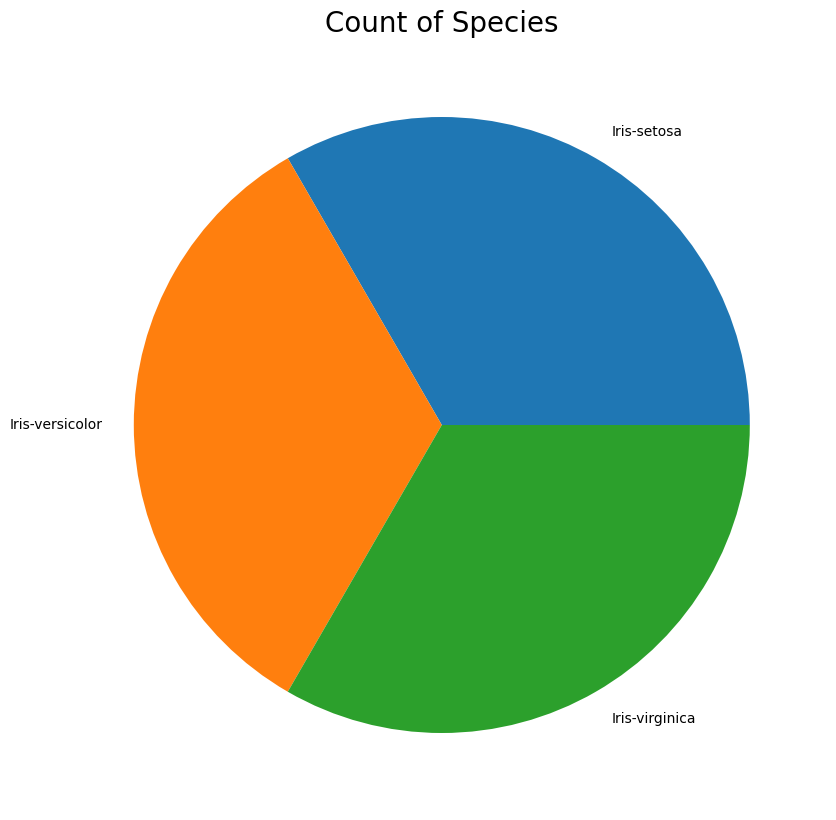

In [9]:
# Counting the Ocuurances of Species' and Representing Via Pie Chart
count =  iris.species.value_counts()
print(count)

plt.figure(figsize=(10,10))
plt.pie(count,labels=iris.species.unique().tolist())
plt.title("Count of Species",fontsize=20)
plt.show()

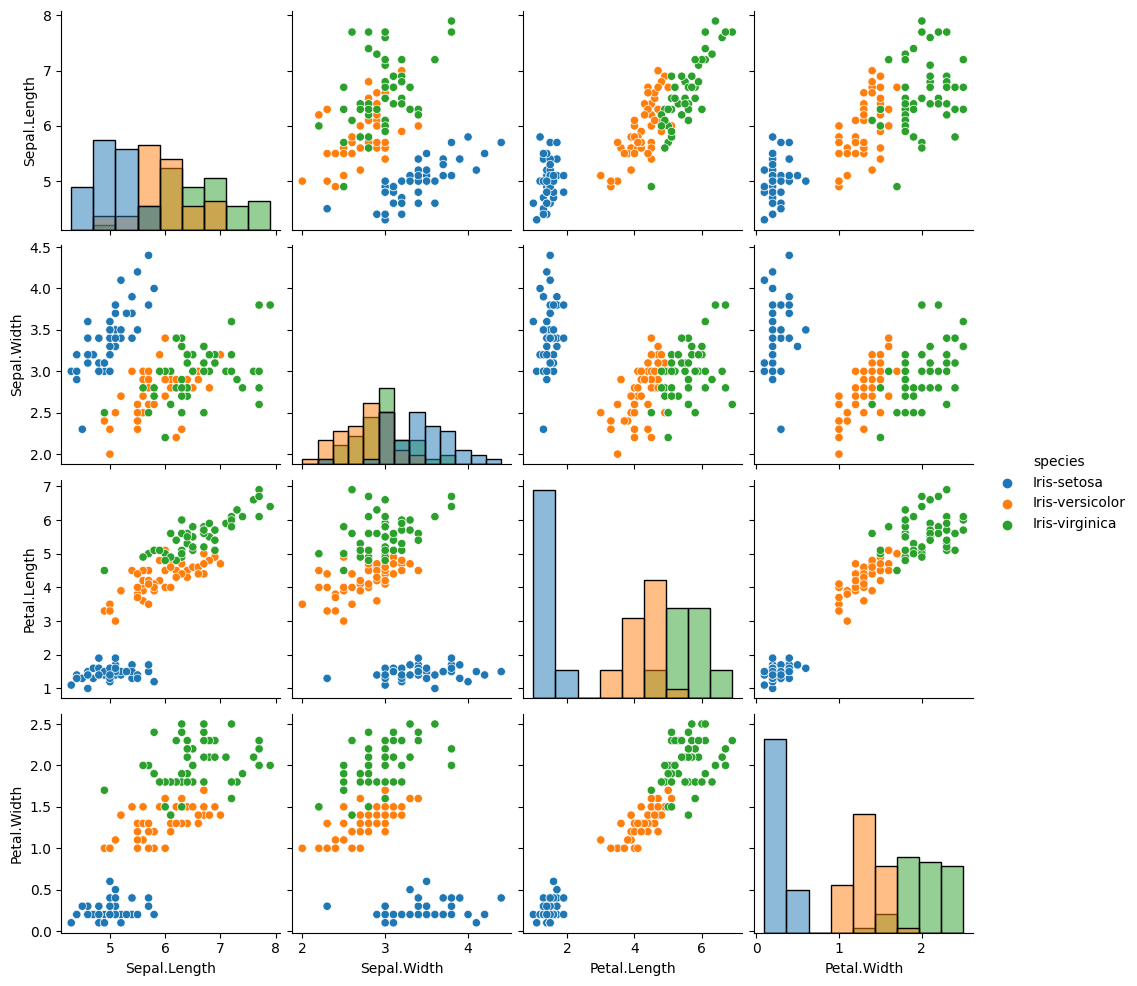

In [10]:
# Creating a pairplot to visualize relationships between different features based on Species
sb.pairplot(iris,hue="species",diag_kind="hist")

In [11]:
# Converting categorical varibales into numbers
iris["species"] = iris["species"].map({'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica':2})

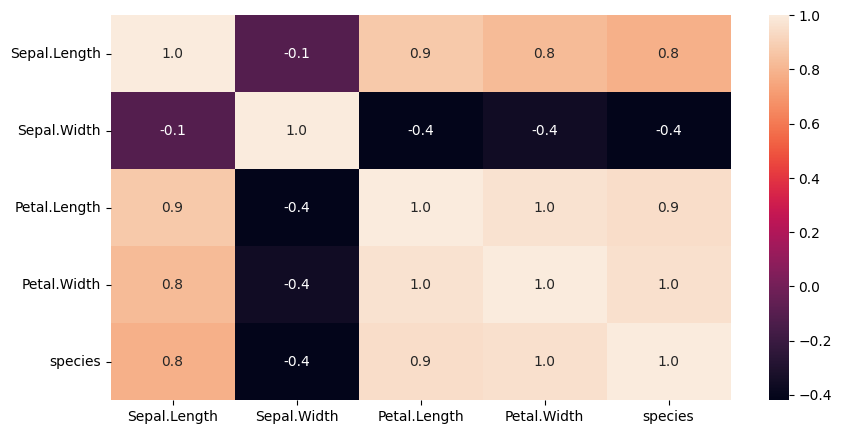

In [12]:
# Creating a heatmap to visualize the correlation between features
plt.figure(figsize=(10,5))
sb.heatmap(iris.corr(),annot=True,fmt='0.1f')
plt.show()

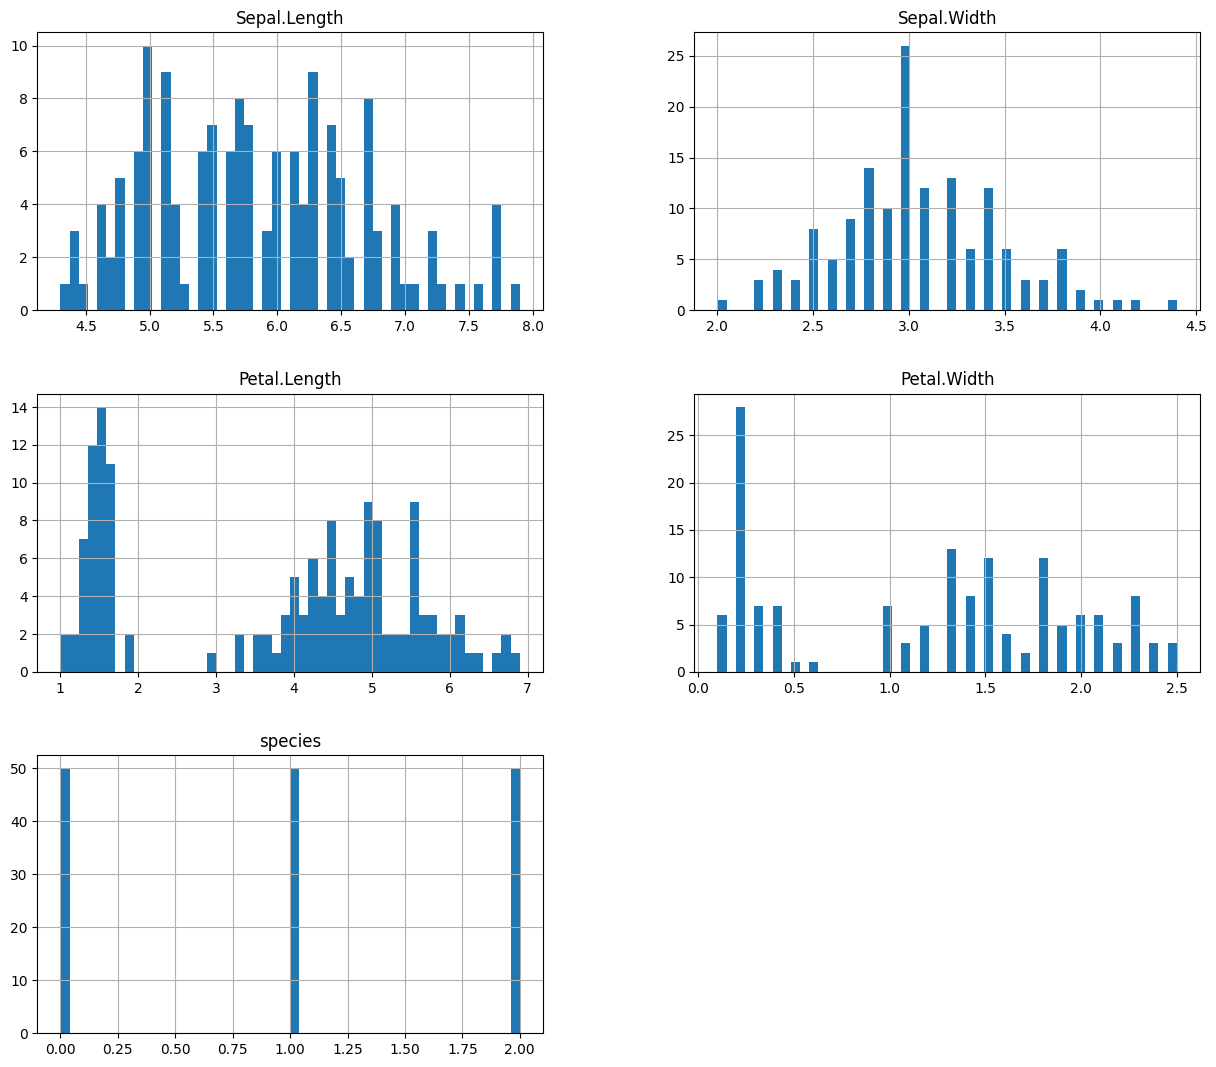

In [13]:
# Creating histograms for each feature to visualize their distributions
iris.hist(figsize=(15,13),bins=50)
plt.show()

In [14]:
# Defining the Features/Independent Variables (X) and Target variable/Dependent Variable (y) 
x = iris.drop('species',axis=1)
y = iris['species']

In [15]:
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [17]:
# Splitting the dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=5)

In [18]:
# Instantiating a Logistic Regression model
model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(x_train, y_train)

# Make predictions on the test data
y_pred_logistic = model_logistic.predict(x_test)

In [19]:
# Calculate binary classification metrics for the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred_logistic)
r2_logistic = r2_score(y_test, y_pred_logistic)
print(f'Accuracy: {accuracy*100}')
print(f'R-squared (R^2): {r2_logistic*100}')

Accuracy: 98.33333333333333
R-squared (R^2): 97.43480119709278


In [20]:
# Classification Metrics of Logistic Regression
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.97        19

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [21]:
# Confusion Matrix of Logistic Regression
print(confusion_matrix(y_test, y_pred_logistic))

[[20  0  0]
 [ 0 20  1]
 [ 0  0 19]]


In [22]:
# Creating new data for prediction
new_data = pd.DataFrame({
    'Sepal.Length':4.6,
    'Sepal.Width':3.2,
    'Petal.Length':1.5,
    'Petal.Width':0.2,
     
},index=[0])
#predicting
prediction = model_logistic.predict(new_data)

if prediction[0]== 0:
    print("Iris-setosa")
elif prediction[0] == 1:
    print("Iris-versicolor")
else:
    print("Iris-virginica")

Iris-setosa
